In [1]:
import pandas as pd

- https://raw.githubusercontent.com/carabedo/labs/master/data/soda
- https://raw.githubusercontent.com/carabedo/labs/master/data/ricota

Se puede repetir el mismo procedimiento con otras letras de canciones

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/carabedo/labs/master/data/luis')

In [3]:
df

,Unnamed: 0,luis
0,0,"['', ' Era una mañana clara',..."
1,1,"['', ' Abrazo y corazón', 'mi..."
2,2,"['', ' There was a time when ..."
3,3,"['', ' Cuatro pasos hacia atr..."
4,4,"['', ' Pronto escaparás en la..."
...,...,...
222,222,"['', ' Sepan', 'yo no puedo d..."
223,223,"['', ' Yo nunca me imaginé re..."
224,224,"['', ' ¡Oh!,', 'exuberante,',..."
225,225,"['', ' Y con la tarde gris', ..."


necesito reducir un poco la cantidad de tokens

In [4]:
df.iloc[:,1]

0      ['', '                  Era una mañana clara',...
1      ['', '                  Abrazo y corazón', 'mi...
2      ['', '                  There was a time when ...
3      ['', '                  Cuatro pasos hacia atr...
4      ['', '                  Pronto escaparás en la...
                             ...                        
222    ['', '                  Sepan', 'yo no puedo d...
223    ['', '                  Yo nunca me imaginé re...
224    ['', '                  ¡Oh!,', 'exuberante,',...
225    ['', '                  Y con la tarde gris', ...
226    ['', '                  No ves,', 'que ya no s...
Name: luis, Length: 227, dtype: object

In [5]:
df.iloc[:,1].str.lower()

0      ['', '                  era una mañana clara',...
1      ['', '                  abrazo y corazón', 'mi...
2      ['', '                  there was a time when ...
3      ['', '                  cuatro pasos hacia atr...
4      ['', '                  pronto escaparás en la...
                             ...                        
222    ['', '                  sepan', 'yo no puedo d...
223    ['', '                  yo nunca me imaginé re...
224    ['', '                  ¡oh!,', 'exuberante,',...
225    ['', '                  y con la tarde gris', ...
226    ['', '                  no ves,', 'que ya no s...
Name: luis, Length: 227, dtype: object

In [10]:
df['estudio']=df.iloc[:,1].str.lower() #paso todo a minuscula

In [11]:
from sklearn.feature_extraction.text import CountVectorizer #tokenizador (agarra muchos documentos y arma la bolsa de palabras)

In [8]:
counter=CountVectorizer() #instancio transformador

In [12]:
df['estudio'].dropna() #saco si hay nulos

0      ['', '                  era una mañana clara',...
1      ['', '                  abrazo y corazón', 'mi...
2      ['', '                  there was a time when ...
3      ['', '                  cuatro pasos hacia atr...
4      ['', '                  pronto escaparás en la...
                             ...                        
222    ['', '                  sepan', 'yo no puedo d...
223    ['', '                  yo nunca me imaginé re...
224    ['', '                  ¡oh!,', 'exuberante,',...
225    ['', '                  y con la tarde gris', ...
226    ['', '                  no ves,', 'que ya no s...
Name: estudio, Length: 227, dtype: object

In [13]:
X=df['estudio'].dropna()

In [14]:
X_t=counter.fit_transform(X) #transformo

In [15]:
counter.vocabulary_

{'era': 1502,
 'una': 4177,
 'mañana': 2613,
 'clara': 788,
 'cuando': 993,
 'en': 1412,
 'el': 1387,
 'mirar': 2673,
 'del': 1112,
 'día': 1369,
 'comprendí': 848,
 'que': 3338,
 'mi': 2649,
 'amor': 207,
 'ese': 1554,
 'cielo': 765,
 'alma': 160,
 'su': 3863,
 'nido': 2828,
 'sin': 3778,
 'querer': 3367,
 'no': 2842,
 'entiendo': 1480,
 'así': 350,
 'porque': 3221,
 'razón': 3421,
 'los': 2488,
 'barcos': 449,
 'vienen': 4315,
 'se': 3662,
 'van': 4218,
 'pesar': 3126,
 'de': 1078,
 'aquel': 282,
 'vacío': 4202,
 'donde': 1316,
 'voy': 4371,
 'está': 1638,
 'tu': 4130,
 'cuerpo': 1020,
 'nos': 2856,
 'ven': 4239,
 'como': 833,
 'las': 2335,
 'rosas': 3581,
 'jardines': 2261,
 'entre': 1485,
 'espinas': 1586,
 'perfumes': 3108,
 'amamos': 180,
 'bajo': 436,
 'sol': 3805,
 'oh': 2898,
 'yo': 4429,
 'penetré': 3077,
 'tan': 3934,
 'lleno': 2438,
 'misterio': 2696,
 'agarro': 87,
 'mis': 2687,
 'libros': 2379,
 'quemo': 3365,
 'todas': 4040,
 'palabras': 2986,
 'falsas': 1698,
 'hoy': 20

In [16]:
X_t.toarray().sum(axis=0)

array([1, 1, 1, ..., 1, 4, 1], dtype=int64)

In [19]:
data=pd.DataFrame(X_t.toarray().sum(axis=0),index=counter.get_feature_names_out(),columns=['freq']) #me armo un dataset con el vocabulario

In [20]:
data.sort_values('freq',ascending=False)

,freq
que,1127
de,1003
la,940
el,837
en,797
...,...
harán,1
haz,1
head,1
hearts,1


In [22]:
data.sort_values('freq',ascending=False).head(10) #ordeno los tokens por mayor frecuencia

,freq
que,1127
de,1003
la,940
el,837
en,797
no,790
un,627
se,544
tu,512
es,489


Se ve que las palabras mas frecuentes son las palabras vacias, hay que sacarlas

In [23]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 445.2 kB/s eta 0:00:29
      --------------------------------------- 0.2/12.9 MB 2.0 MB/s eta 0:00:07
     ----- ---------------------------------- 1.8/12.9 MB 12.7 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.9 MB 19.0 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.9 MB 22.8 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.9 MB 24.9 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.9 MB 27.0 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.9 MB 36.3 MB/s eta 0:00:01
     ------------------------------------- - 12.3/12.9 MB 36.4 MB/s eta 0:00:01
     --------------------------------------  12.9/12.9 MB 36.4 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 32.8 MB/s eta 0:00:00
✔ Download and installation successful
You can no

In [24]:
import spacy

nlp = spacy.load("es_core_news_sm")

In [25]:
from spacy.lang.es import stop_words as stop_words

In [26]:
stop_words = stop_words.STOP_WORDS

In [28]:
list(stop_words) #lista de palabras vacias de spacy

['dado',
 'qeu',
 'explicó',
 'último',
 'estoy',
 'podrían',
 'incluso',
 'aquellas',
 'otra',
 'once',
 'eso',
 'despues',
 'aquello',
 'siendo',
 'tarde',
 'mis',
 'informo',
 'diferente',
 'supuesto',
 'lo',
 'nadie',
 'partir',
 'usted',
 'entonces',
 'quizas',
 'saber',
 'poder',
 'debido',
 'mucha',
 'enfrente',
 'debe',
 'los',
 'que',
 'buen',
 'puedo',
 'paìs',
 'aquélla',
 'no',
 'ahi',
 'existen',
 'alguna',
 'ahora',
 'ti',
 'debajo',
 'sabemos',
 'bien',
 'suyo',
 'diez',
 'sabe',
 'todavia',
 'cierto',
 'pero',
 'haber',
 'haya',
 'muy',
 'siempre',
 'cuánto',
 'son',
 'asi',
 'existe',
 'me',
 'luego',
 'quien',
 'quiénes',
 'su',
 'yo',
 'bastante',
 'usa',
 'dar',
 'propias',
 'podriais',
 'podrá',
 'aún',
 'segundo',
 'total',
 'dicen',
 'suya',
 'fuera',
 'demasiado',
 'tu',
 'tercero',
 'dijeron',
 'es',
 'dijo',
 'además',
 'estaban',
 'realizó',
 'todavía',
 'han',
 'habían',
 'nuestros',
 'hasta',
 'aquellos',
 'solo',
 'antes',
 'toda',
 'un',
 'cierta',
 'tene

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
counter=CountVectorizer(stop_words=list(stop_words)) #le paso la lista de las palabras vacias

In [31]:
X_t=counter.fit_transform(X)

In [32]:
data=pd.DataFrame(X_t.toarray().sum(axis=0),index=counter.get_feature_names_out(),columns=['freq'])

In [33]:
data.sort_values('freq',ascending=False).head(10)

,freq
amor,240
oh,226
luz,195
sol,126
ojos,101
alma,96
cielo,89
quiero,88
mundo,81
nena,79


In [34]:
counter=CountVectorizer(stop_words=list(stop_words),ngram_range=(2,2))

In [35]:
X_t=counter.fit_transform(X)

In [36]:
pd.DataFrame(X_t.toarray().sum(axis=0),index=counter.get_feature_names_out(),columns=['freq']).sort_values('freq',ascending=False)


,freq
oh oh,32
uh uh,16
oh amor,14
vuelo vuelo,13
ves luz,13
...,...
formas llegar,1
formas formas,1
formas estarás,1
formas buscan,1


In [37]:
text=''.join(df.luis.values)

In [39]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


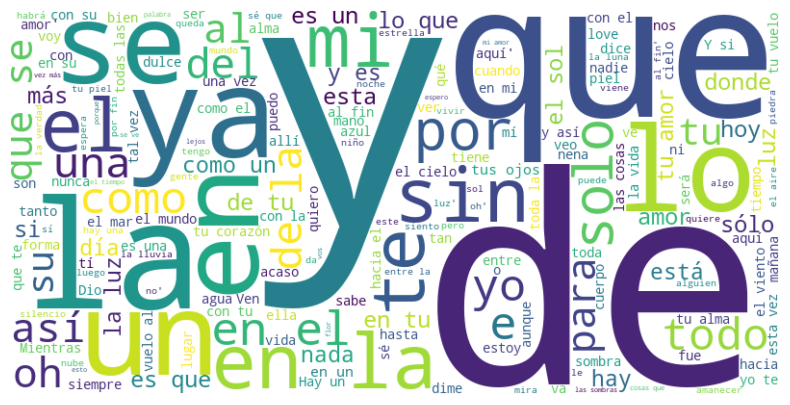

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()


In [41]:


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=list(stop_words)
).generate(text)


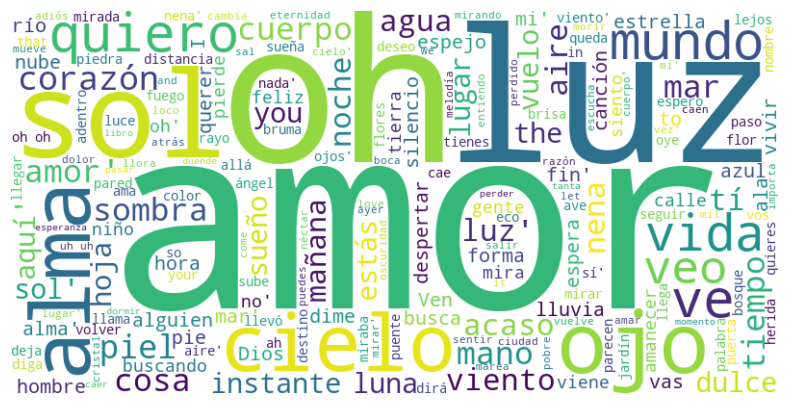

In [42]:
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

In [43]:
text2=' '.join([x.replace(' ','_') for x in counter.vocabulary_.keys()])

In [44]:
text2

'mañana_clara clara_mirar mirar_comprendí comprendí_amor amor_cielo cielo_alma alma_nido nido_querer querer_entiendo entiendo_razón razón_barcos barcos_vienen vienen_vacío vacío_cuerpo cuerpo_ven ven_rosas rosas_jardines jardines_espinas espinas_perfumes perfumes_amamos amamos_sol sol_oh oh_penetré penetré_lleno lleno_misterio misterio_amor amor_oh oh_agarro agarro_libros libros_quemo quemo_palabras palabras_falsas falsas_comienza comienza_enero enero_oh oh_rosas sol_palabras palabras_silencio silencio_profundo profundo_atroz atroz_razón vienen_uh uh_agarro abrazo_corazón corazón_grito grito_voz voz_viento viento_libertad libertad_huella huella_andar andar_fuego fuego_fragilidad fragilidad_lágrimas lágrimas_humedad humedad_luna luna_bendición bendición_brillo brillo_sol sol_llevaré llevaré_olor olor_vivir vivir_sangre sangre_vidas vidas_salvaré salvaré_lamentar lamentar_andas andas_alzaré alzaré_verán verán_ven ven_jamás jamás_pueblito pueblito_soledad soledad_pobreza pobreza_golpeó go

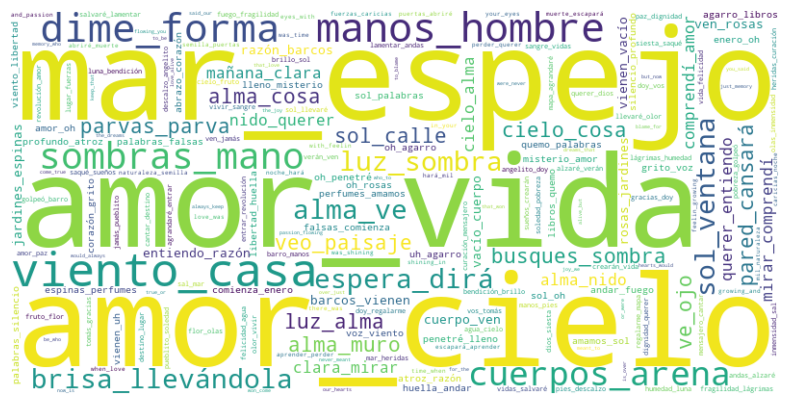

In [45]:
#BIGRAMAS: se empiezan a analizar las palabras en conjunto (de a dos) para reconocer nuevos patrones 

wordcloud2 = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text2)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()
